In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Implement the 10-armed Testbed

In [3]:
def get_bandit_function(bandits_means, bandits_sigma=1):
    def bandit_function(action):
        # function prototype with deviation, see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html
        return bandit_means[action] * np.random.randn(1) * bandits_sigma
    return bandit_function

In [4]:
bandit_means = np.array([-2.04402703,  0.78691329, -1.51854861, -0.74964035, 0.87538815, 1.51307674, -1.43232683, -0.62838404, -0.03584927, -0.29624793])
bnd_fc = get_bandit_function(bandit_means, bandits_sigma=1)
bnd_fc(action=4)

array([ 0.84317474])

In [5]:
# 3. Implementation of a simple ϵ-greedy bandit algorithm

In [11]:
Q = np.full((10), 0.)
print(Q)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
def get_average_rewards(epsilon=0.1, optimistic=0., nb_runs=2000, nb_steps=1000):
    Q_Avg = np.zeros(nb_steps)
    for i in range(0, nb_runs):
        Q = np.full((10), optimistic) # test plz kthxbai
        N = np.zeros(10)
        bandit_func = get_bandit_function(np.zeros(10))
        for j in range(nb_steps):
            action = 0
            if (np.random.randn(1) <= epsilon):
                #random exploration
                action = np.random.randint(0,10)  
            else:
                # greedy action
                action = np.argmax(Q)
            N[action] = N[action] + 1
            reward = bandit_func(action)
            Q[action] = Q[action] + (1/N[action]) * (reward - Q[action])
            
              
            Q_Avg[j] = Q_Avg[j] + ((1/(i+1) * reward-Q_Avg[j]))
        #     
    return Q_Avg
        # Q_Avg[nb_runs] = np.sum(Q) / len(Q)
        
    """
    Compute the average reward for different 10-armed bandit problems.
    
    Parameters
    ----------
    epsilon : float
        epsilon: probability of chosing a random action (exploration).
    optimistic: float
        Initial value value of all action-values.
    nb_runs: int
        Number of runs with different 10-armed bandits for the averaging.
    nb_steps: int
        Number of steps. How often each bandit is played.
    
    Returns
    -------
    numpy array (dtype: double)
        averaged rewards. i-th element in the array contains the average reward at iteration step i.
    numpy array (dtype: double)
        averaged percentage of using the optimal action. i-th element in the array contains the average reward at iteration step i.    
    """
    raise NotImplementedError()

In [7]:
#avg_rewards_e01, optimal_actions_e005 = get_average_rewards(epsilon=0.1, optimistic=0.)
#avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
#avg_rewards_e001, optimal_actions_e005 = get_average_rewards(epsilon=0.01, optimistic=0.)
#avg_rewards_greedy, optimal_actions_e005 = get_average_rewards(epsilon=0, optimistic=0.)

avg_rewards_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
avg_rewards_e001 = get_average_rewards(epsilon=0.01, optimistic=0.)
avg_rewards_greedy = get_average_rewards(epsilon=0, optimistic=0.)
print(avg_rewards_e001)
nb_steps = len(avg_rewards_e005)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

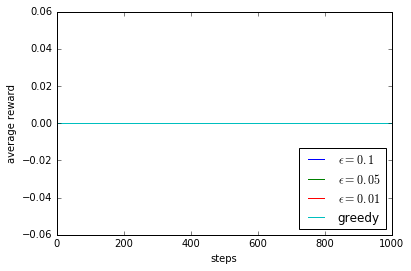

In [8]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()


In [9]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")

NameError: name 'optimal_actions_e01' is not defined